In [1]:
import pygmt 
import pandas as pd
import os,glob
import matplotlib.pyplot as plt
import pickle
from obspy.geodetics.base import gps2dist_azimuth

In [63]:
PATH = '/Volumes/home/Research/STEP/02_Station_result_csv/'
Lithnc = '/Volumes/home/Research/GMT/LithoThickness/LithThickness.nc'
Mohonc = '/Volumes/home/Research/DataBase/01_Armenia/04_Moho_fit_fromCM.nc'
PKLpath = '/Volumes/home/Research/STEP/01_Split'
Resultcsv='/Volumes/home/Research/STEP/05_Station_result_statistics/Station_SK(K)S_2010-2020average_v4.csv'
Volcanocsv='/Volumes/home/Research/DataBase/01_Armenia/02_Volcano_list.csv'
dr = pd.read_csv(Resultcsv)
dv = pd.read_csv(Volcanocsv)

In [64]:
dv

,VolcanoName,lat,lon,region,age,LastEruption,Plottype,http,Reference
0,Aragats,40.530,44.200,Armenia,Holocene,3000 BCE,1,https://volcano.si.edu/volcano.cfm?vn=214060,"Kharakanian et al., 2003"
1,Ghegham,40.283,45.000,Armenia,Holocene,1900 BCE,1,https://volcano.si.edu/volcano.cfm?vn=214070,"Sherriff JE et al.,2019"
2,Vaiyots-Sar,39.797,45.497,Armeniam,Holocene,2000 BCE,1,https://volcano.si.edu/volcano.cfm?vn=214080,"Kharakanian et al., 2003"
3,Kazbek,42.700,44.500,Georgia,Holocene,750 BCE,1,https://volcano.si.edu/volcano.cfm?vn=214020,Gushchenko (1979)
4,Samsari,41.542,43.700,Georgia,Holocene,unknown,2,https://volcano.si.edu/volcano.cfm?vn=214050,NaN
5,Nemrut Dagi,38.654,42.229,Turkey,Holocene,1650 CE,1,https://volcano.si.edu/volcano.cfm?vn=213020,https://doi.org/10.1016/j.jvolgeores.2012.06.031
6,Ararat,39.700,44.300,Turkey,Holocene,1840 CE,1,https://volcano.si.edu/volcano.cfm?vn=213040,Karakhanian et al. (2002)
7,Porak,40.028,45.740,Armenia-Azerbaijan,Pleistocene,778 BCE,1,https://volcano.si.edu/volcano.cfm?vn=214090,"Haroutiunian R A, 2006."
8,Tskhouk-Karckar,39.742,45.992,Armenia-Azerbaijan,Holocene,3000 BCE,1,https://volcano.si.edu/volcano.cfm?vn=214100,Karakhanian et al. (2002)
9,Elbrus,43.351,42.442,Russia,Holocene,50 CE,1,https://volcano.si.edu/volcano.cfm?vn=214010,"Karakhanian et al., 2002"


In [46]:
regvals = [40, 47, 39.5, 44.5]
APM = 65

In [74]:
figmap = pygmt.Figure()
figmap.basemap(region=regvals, projection="M15c", frame = ['x1f0.5', 'y1f0.5', 'nSeW'])
# figmap.grdimage('@earth_relief_30s',region =regvals, cmap="eleva.cpt",monochrome=True, shading=True, transparency=50)
figmap.coast(resolution = 'h', shorelines ='0.5/thinnest,black', water='white', borders = '1/0.3p')

figmap.plot(x=[41.3,45.7],y=[42,40],pen="1p,red")
figmap.plot(x=42.8604383662,y=41.3236173673, style='c0.2c')

for i in range(len(dv)):
    vlat= dv['lat'].values[i]
    vlon= dv['lon'].values[i]
    name= dv['VolcanoName'].values[i] 
    figmap.plot(x=vlon,y=vlat,style='c0.2c',color='black')
    figmap.text(x=vlon,y=vlat-0.15,text=name,font='7p')

coast [WARNING]: Length <unit> t not supported - revert to default unit [point]
coast [WARNING]: 0.5/thinnes not a valid number and may not be decoded properly.


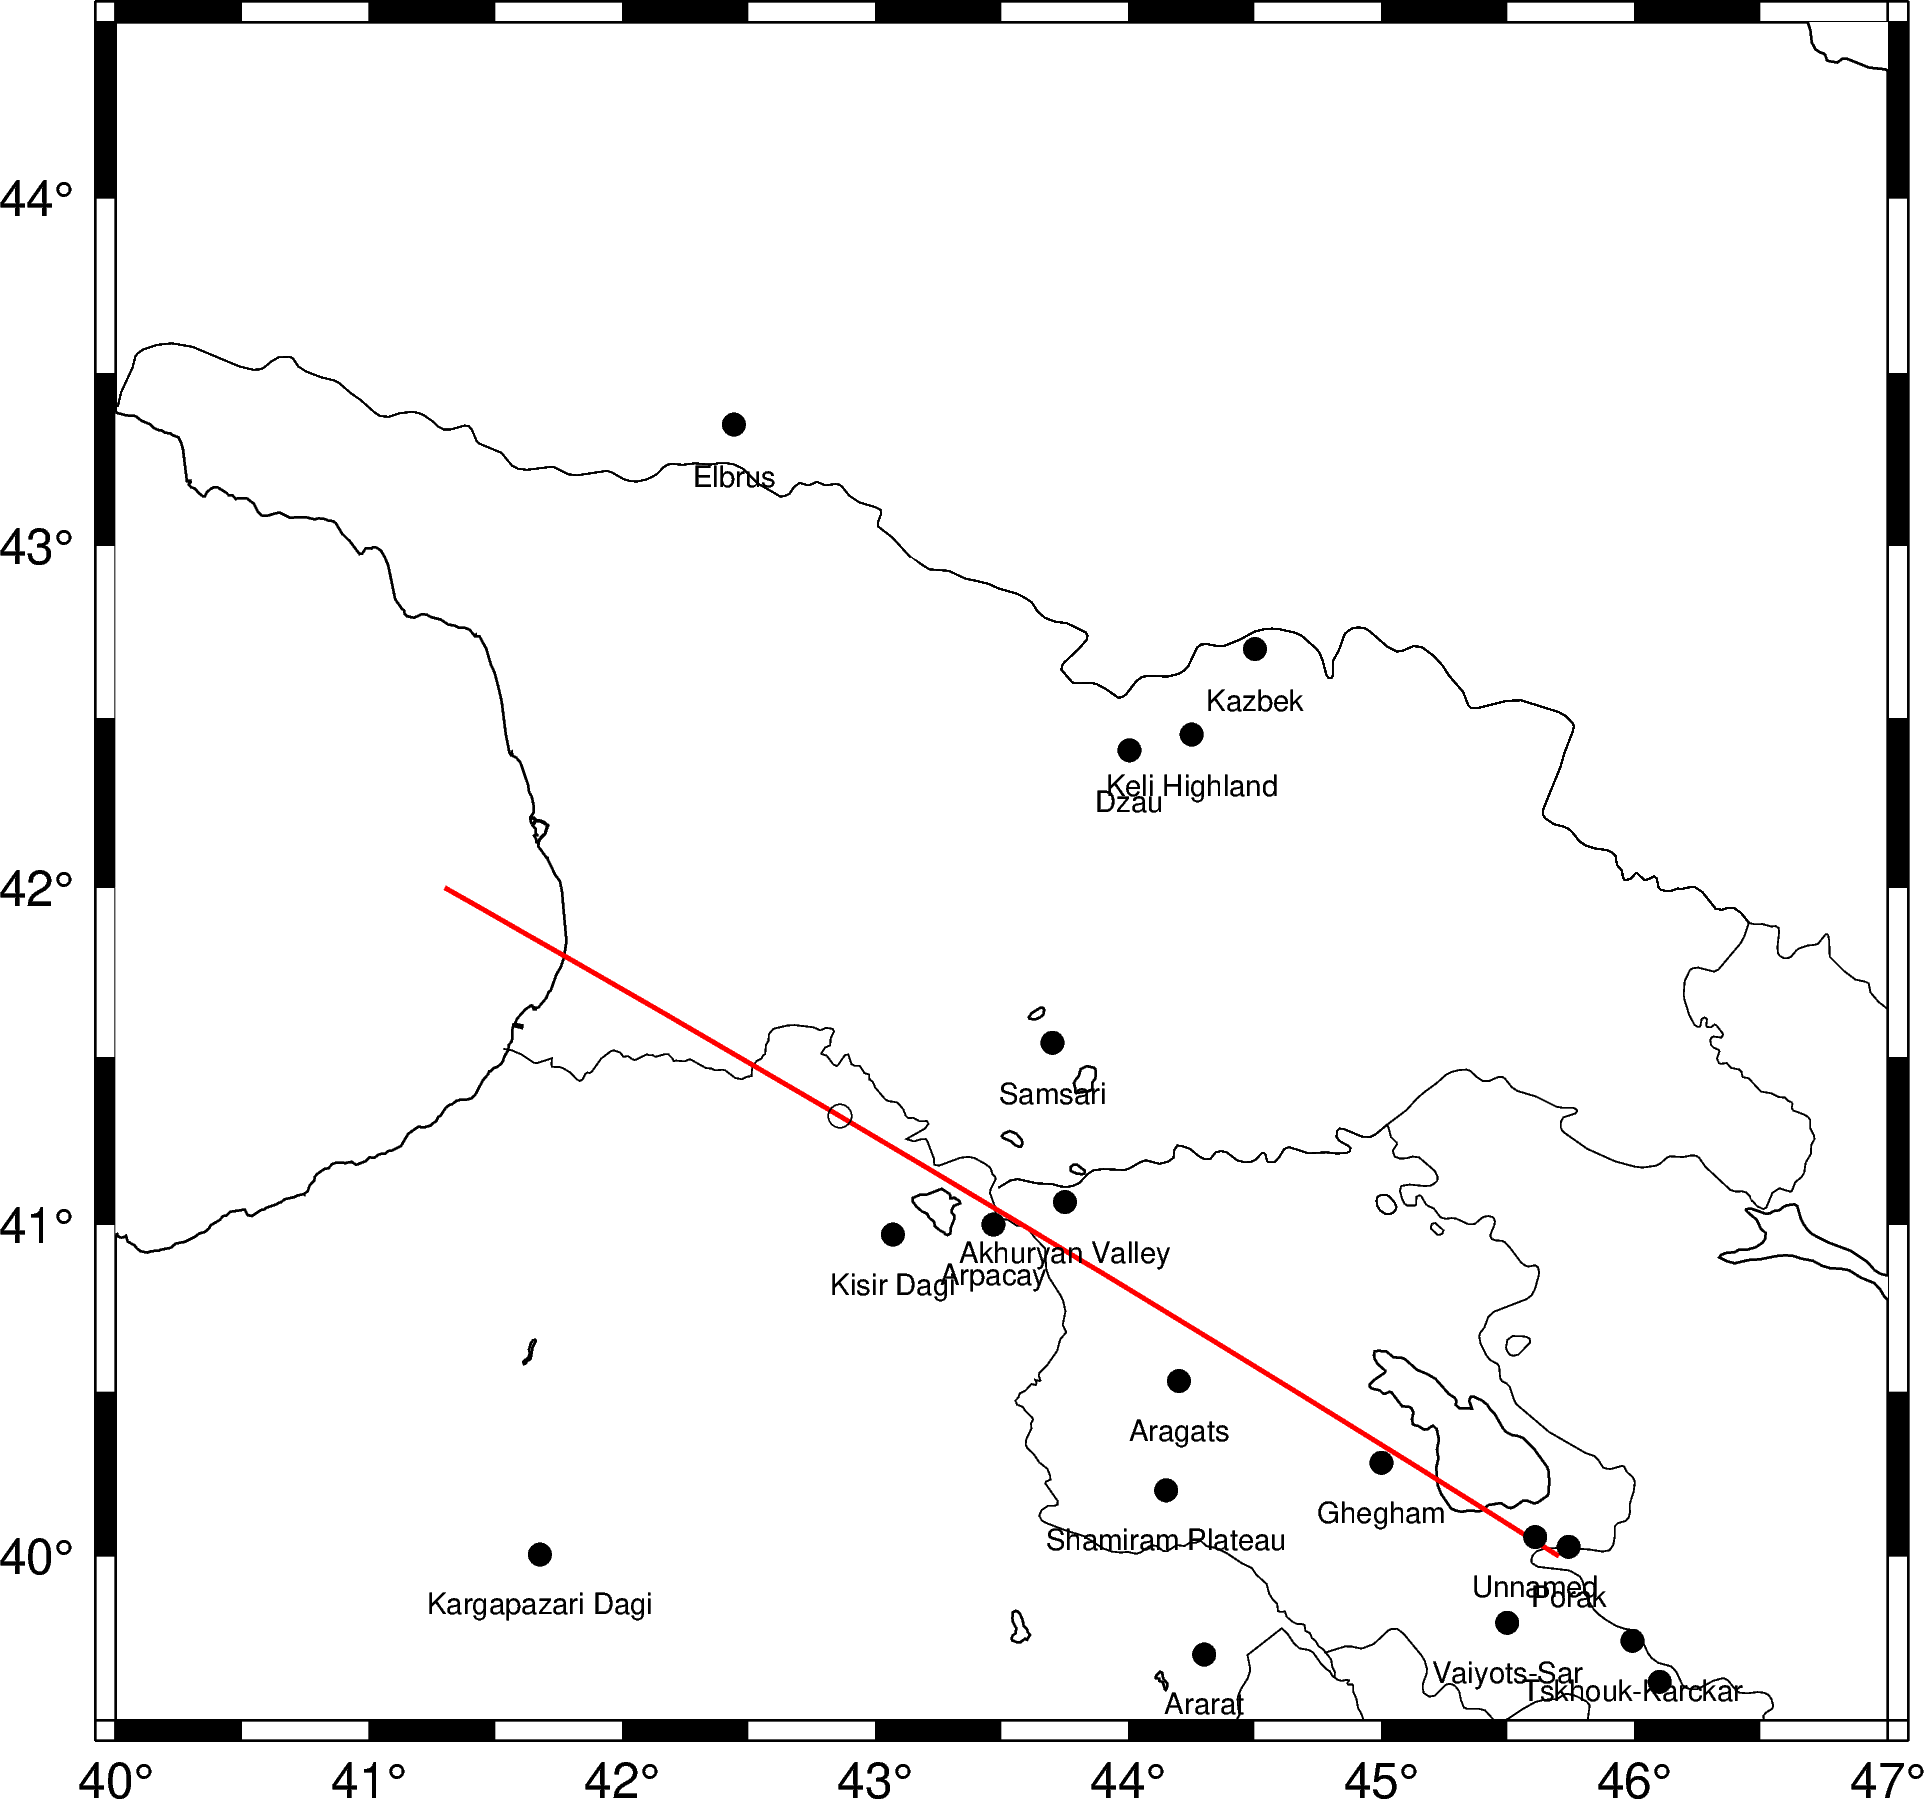

In [75]:
figmap.show()

In [76]:
volname=['Kisir Dagi','Arpacay','Akhuryan Valley','Samsari','Aragats','Shamiram Plateau','Ghegham','Vaiyots-Sar','Unnamed','Porak']

In [78]:
VOLDIST = []
PLOTtype= []
for name in volname:
    dv_lon = dv[dv['VolcanoName']==name]['lon'].values[0]
    dv_lat = dv[dv['VolcanoName']==name]['lat'].values[0]
    voltype= dv[dv['VolcanoName']==name]['Plottype'].values[0]
    cmd = '''
    echo %(dv_lon)f %(dv_lat)f | gmt project -C41.3/42 -E45.7/40 -Frs -Q
    ''' %locals()
    p = os.popen(cmd)
    text = str(p.read())
    p.close()
    p_lon=float(text.rsplit('\t')[0])
    p_lat=float(text.rsplit('\t')[-1].rsplit('\n')[0])
#     print(p_lon,p_lat)
    dist,az,baz = gps2dist_azimuth(p_lat,p_lon,42,41.3)
    VOLDIST.append(dist/1000)   
    PLOTtype.append(voltype)

In [6]:
points1 = pygmt.project(center=[41.3, 42], endpoint=[45.7, 40], generate=0.05,unit=True)
figmap.plot(x=points1.r, y=points1.s, pen="2p,seagreen")

In [7]:
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=regvals)
trackfile = pygmt.grdtrack(points=points1,grid=grid,newcolname="bathymetry")

In [8]:
Lithfile = pygmt.grdtrack(points=points1,grid=Lithnc,newcolname="Thickness")
Mohofile = pygmt.grdtrack(points=points1,grid=Mohonc,newcolname="Thickness")

In [9]:
DIST = []
dtlist = []; ddtlist = []
philist = []; dphilist = []
for STApath in glob.glob(f'{PKLpath}/*.pkl'):
    STApkl = pickle.load(open(STApath, "rb"))
    values = [value for keys, value in STApkl.items() ][0]
    
    NET = values['network']; STA = values['station']
    print(f'{NET}.{STA}')
    st_lat = values['latitude']; st_lon = values['longitude']
    cmd = '''
    echo %(st_lon)f %(st_lat)f | gmt project -C41.3/42 -E45.7/40 -Frs -Q
    ''' %locals()
    p = os.popen(cmd)
    text = str(p.read())
    p.close()
    p_lon=float(text.rsplit('\t')[0])
    p_lat=float(text.rsplit('\t')[-1].rsplit('\n')[0])
    print(p_lon,p_lat)
    dist,az,baz = gps2dist_azimuth(p_lat,p_lon,42,41.3)
    DIST.append(dist/1000)
    
    dt = dr[dr['Station']==f'{NET}.{STA}']['SCdt'].values[0]
    ddt = dr[dr['Station']==f'{NET}.{STA}']['SCddt'].values[0]
    phi = dr[dr['Station']==f'{NET}.{STA}']['SCphi'].values[0]
    dphi = dr[dr['Station']==f'{NET}.{STA}']['SCdphi'].values[0]
    dtlist.append(dt)
    ddtlist.append(ddt)
    dphilist.append(dphi)
    philist.append(phi)

AM.ALAV
44.3600405991 40.6398239721
AM.ARZA
44.6104008885 40.522368267
AM.BAUR
43.6758362889 40.9559807346
AM.BYUR
44.4764563032 40.5853264588
AM.GERK
45.1460007468 40.2678795622
AM.KECH
45.7910649816 39.9555108402
AM.LICH
44.8507186059 40.4087254777
AM.MAGY
44.1565055078 40.7346109981
AM.NAVR
44.9381226834 40.3671742655
AM.SHEN
44.1444054409 40.7402263101
AM.TSAP
45.3072537188 40.1903975454
AM.VAND
44.2728366017 40.6805119728
AM.ZARN
44.0327327236 40.7919462711
GO.AKH
43.2753865981 41.1377641382
GO.BGD
43.4382205897 41.0641342656
GO.CHVG
41.4691965018 41.9283607891
GO.DGRG
44.6053109862 40.5247656754
GO.GUDG
43.3617845215 41.0987460477
GO.ONI
42.54884308 41.4615110788
GO.SEAG
44.0136195822 40.80077946
GO.TBLG
43.9863797121 40.813358928
GO.TRLG
43.6423808177 40.971259398
II.KIV
41.1803233159 42.0504251638
IU.GNI
44.9674561759 40.3532031025
TG.ABST
42.5732455232 41.4507634016
TG.AMBR
42.3634104585 41.5428975163
TG.AZMN
43.1781735147 41.1815339442
TG.BATM
41.826036774 41.7759250994
TG.BK

Text(0, 0.5, 'Fast Direction (°)')

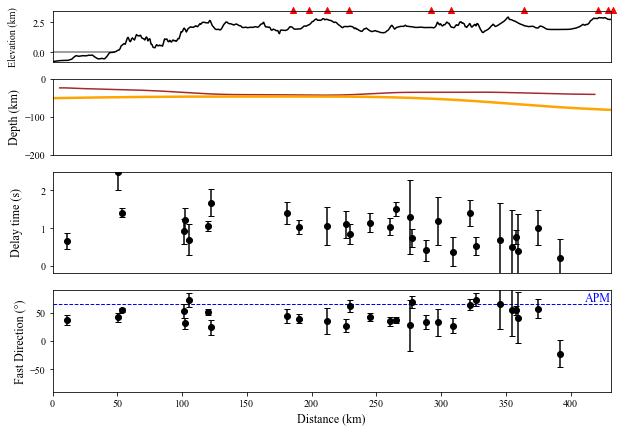

In [88]:
plt.rc('font',family='Times New Roman')
maxdist = max(Mohofile['p'])
fig, axs = plt.subplots(4,1,figsize=(10,7),gridspec_kw={'height_ratios': [1, 1.5, 2, 2]})
plt.subplot(411)
plt.xticks([])
plt.hlines(y=0,xmin=0,xmax=48,color='gray',ls='-')
plt.plot(trackfile['p'],trackfile['bathymetry']/1000,'k')
plt.xlim(0,maxdist)
plt.ylim(-0.8,3.5)
plt.ylabel('Elevation (km)\n', fontsize=10)
plt.scatter(VOLDIST,[3.5]*len(VOLDIST),color='r',marker='^',clip_on=False)

plt.subplot(412)
plt.plot(Mohofile['p'],-1*Mohofile['Thickness'],c='brown')
plt.plot(Lithfile['p'],-1*Lithfile['Thickness'],c='orange',lw=2.5)
plt.xlim(0,maxdist)
plt.ylim(-200,0)
plt.xticks([])
plt.ylabel('Depth (km)', fontsize=12)

plt.subplot(413)
plt.errorbar(DIST, dtlist, yerr = ddtlist, fmt='o',markeredgecolor='k',color ='k',ecolor='k',capsize=3) 
plt.ylim(-0.2,2.5)
plt.xlim(0,maxdist)
plt.xticks([])
plt.ylabel('Delay time (s)\n', fontsize=12)

plt.subplot(414)
plt.hlines(y=APM,xmin=0,xmax=maxdist,ls='--',color='b',lw=1)
plt.text(x=maxdist,y=APM-20,s='APM\n',c='blue',ha='right',fontsize=12)
plt.errorbar(DIST, philist, yerr = dphilist, fmt='o',markeredgecolor='k',color ='k',ecolor='k',capsize=3) 
plt.ylim(-90,90)
plt.xlim(0,maxdist)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Fast Direction (°)', fontsize=12)



In [ ]:
dtlist

[1.2,
 1.3999999999999999,
 0.83999999999999997,
 0.38,
 nan,
 nan,
 nan,
 0.72999999999999998,
 0.5,
 1.3,
 0.20000000000000001,
 0.40999999999999998,
 1.51,
 1.03,
 nan,
 nan,
 nan,
 nan,
 1.0600000000000001,
 nan,
 1.04,
 nan,
 0.67000000000000004,
 0.76000000000000001,
 1.6799999999999999,
 1.23,
 1.3999999999999999,
 2.5,
 nan,
 nan,
 nan,
 1.01,
 1.1399999999999999,
 1.0600000000000001,
 nan,
 nan,
 nan,
 0.40000000000000002,
 0.92000000000000004,
 1.1000000000000001,
 0.69999999999999996,
 0.62,
 0.69999999999999996,
 nan,
 0.53000000000000003,
 1.4099999999999999]